In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import dcor
import seaborn as sns

In [2]:
wimbledon = pd.read_csv("./Wimbledon_featured_matches.csv")
wimbledon.head()

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN


In [3]:
wimbledon['elapsed_time_td'] = pd.to_timedelta(wimbledon['elapsed_time'])
wimbledon['time_diff'] = wimbledon.groupby('match_id')['elapsed_time_td'].diff().dt.total_seconds()
wimbledon['time_diff'] = wimbledon.groupby('match_id')['time_diff'].fillna(
    wimbledon['elapsed_time_td'].dt.total_seconds()
)
wimbledon.loc[299: 304, ['match_id', 'elapsed_time', 'time_diff']]

,match_id,elapsed_time,time_diff
299,2023-wimbledon-1301,03:56:11,37.0
300,2023-wimbledon-1302,00:00:00,0.0
301,2023-wimbledon-1302,00:00:36,36.0
302,2023-wimbledon-1302,00:00:58,22.0
303,2023-wimbledon-1302,00:01:52,54.0
304,2023-wimbledon-1302,00:02:32,40.0


In [86]:
data = wimbledon.loc[:,['match_id', 'set_no', 'game_no','p1_points_won', 'p2_points_won', 
                        'p1_ace', 'p1_winner', 'p1_unf_err', 'p1_break_pt_won', 'p1_net_pt_won', 
                        'p1_break_pt', 'p1_break_pt_missed', 'server']]
data['server'] = data['server'].replace(2, -1)
data.head()

,match_id,set_no,game_no,p1_points_won,p2_points_won,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,p1_break_pt,p1_break_pt_missed,server
0,2023-wimbledon-1301,1,1,0,1,0,0,1,0,0,0,0,1
1,2023-wimbledon-1301,1,1,1,1,0,0,0,0,0,0,0,1
2,2023-wimbledon-1301,1,1,1,2,0,0,1,0,0,0,0,1
3,2023-wimbledon-1301,1,1,2,2,0,1,0,0,0,0,0,1
4,2023-wimbledon-1301,1,1,3,2,1,1,0,0,0,0,0,1


In [87]:
def select_variables(match_data, indicator, index, if_diff):
    grouped_data = match_data.groupby(['match_id', 'set_no', 'game_no'])[indicator].apply(lambda x: x.values.tolist()).reset_index(name=index)
    points_won_lists = grouped_data[index].tolist()
    if if_diff:
        points_won_lists = [[p1 - p2 for p1, p2 in match] for match in points_won_lists]
    return points_won_lists

In [88]:
def show_variables(ylabel, points_won_lists):
    np.random.seed(42)
    selected_indices = np.random.choice(len(points_won_lists), size=3, replace=False)
    selected_matches_diffs = [points_won_lists[i] for i in selected_indices]
    plt.figure(figsize=(12, 6))
    for i, match_diffs in enumerate(selected_matches_diffs, start=1):
        plt.subplot(1, 3, i)
        plt.plot(match_diffs, marker='o', linestyle='-', label=f'Match {selected_indices[i-1]}')
        plt.xlabel('Point Sequence')
        plt.ylabel(ylabel)
        plt.title(f'Match {selected_indices[i-1]} Point Difference')
        plt.axhline(y=0, color='grey', linestyle='--')
        plt.legend()
    plt.tight_layout()
    plt.show()

[[-1, 0, -1, 0, 1, 0, 1, 0, 1, 2], [1, 2, 3, 2, 1, 2, 1, 0], [1, 2, 1, 2, 3], [2, 1, 0, -1], [0, 1, 2, 1, 0, -1, 0, 1]]


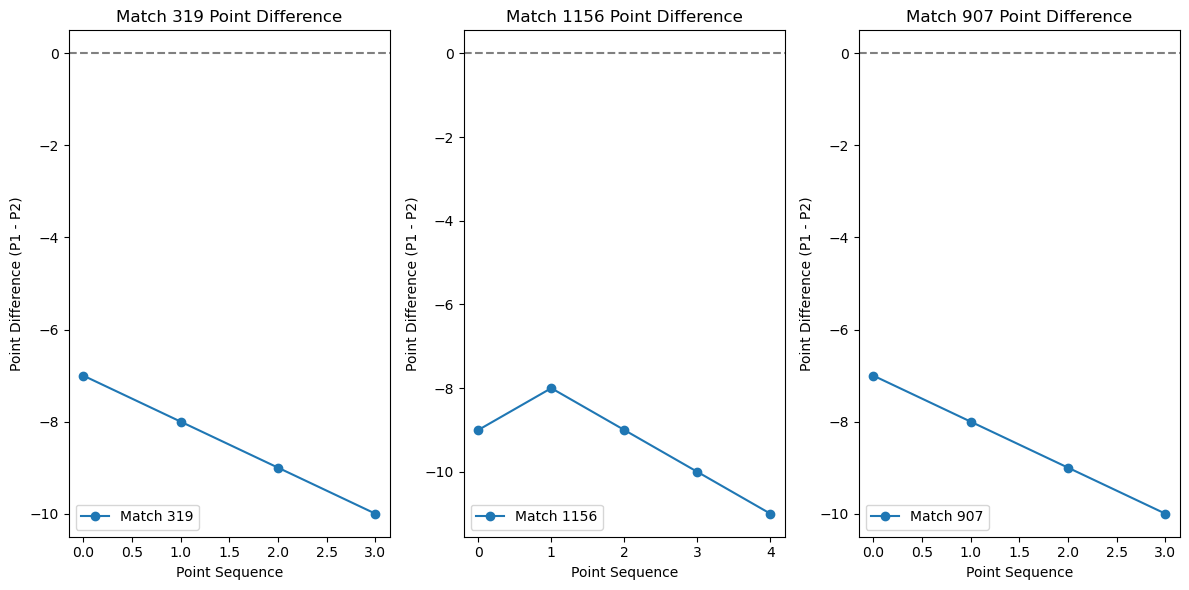

,match_id,set_no,game_no,p1_points_won,p2_points_won,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,p1_break_pt,p1_break_pt_missed,server,points_won_list
0,2023-wimbledon-1301,1,1,0,1,0,0,1,0,0,0,0,1,-1
1,2023-wimbledon-1301,1,1,1,1,0,0,0,0,0,0,0,1,0
2,2023-wimbledon-1301,1,1,1,2,0,0,1,0,0,0,0,1,-1
3,2023-wimbledon-1301,1,1,2,2,0,1,0,0,0,0,0,1,0
4,2023-wimbledon-1301,1,1,3,2,1,1,0,0,0,0,0,1,1


In [89]:
points_won_lists = select_variables(data, ['p1_points_won', 'p2_points_won'], 'points_won_list', True)
print(points_won_lists[:5])
show_variables('Point Difference (P1 - P2)', points_won_lists)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['points_won_list'] = points_won_lists
data.head()

In [92]:
data = data.drop(['match_id', 'set_no', 'game_no','p1_points_won', 'p2_points_won'], axis=1)
data

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,p1_break_pt,p1_break_pt_missed,server,points_won_list
0,0,0,1,0,0,0,0,1,-1
1,0,0,1,0,0,0,0,1,0
2,0,0,2,0,0,0,0,1,-1
3,0,1,2,0,0,0,0,1,0
4,1,2,2,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
7279,0,1,1,0,0,0,0,1,0
7280,0,2,1,0,1,0,0,1,1
7281,0,2,1,0,1,0,0,1,0
7282,0,2,1,0,1,0,0,1,1


In [93]:
data = (data - data.mean()) / data.std()
data

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,p1_break_pt,p1_break_pt_missed,server,points_won_list
0,-0.352372,-0.744632,0.505652,-0.118081,-0.509532,-0.198624,-0.225916,1.021198,-0.223987
1,-0.352372,-0.744632,0.505652,-0.118081,-0.509532,-0.198624,-0.225916,1.021198,-0.119549
2,-0.352372,-0.744632,1.659999,-0.118081,-0.509532,-0.198624,-0.225916,1.021198,-0.223987
3,-0.352372,0.403665,1.659999,-0.118081,-0.509532,-0.198624,-0.225916,1.021198,-0.119549
4,1.955826,1.551962,1.659999,-0.118081,-0.509532,-0.198624,-0.225916,1.021198,-0.015111
...,...,...,...,...,...,...,...,...,...
7279,-0.352372,0.403665,0.505652,-0.118081,-0.509532,-0.198624,-0.225916,1.021198,-0.119549
7280,-0.352372,1.551962,0.505652,-0.118081,1.212833,-0.198624,-0.225916,1.021198,-0.015111
7281,-0.352372,1.551962,0.505652,-0.118081,1.212833,-0.198624,-0.225916,1.021198,-0.119549
7282,-0.352372,1.551962,0.505652,-0.118081,1.212833,-0.198624,-0.225916,1.021198,-0.015111


In [94]:
def compute_dcor_matrix(df):
    n = df.shape[1]
    dcor_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            dcor_val = dcor.distance_correlation(df.iloc[:, i], df.iloc[:, j])
            dcor_matrix[i, j] = dcor_matrix[j, i] = dcor_val
    return dcor_matrix

In [95]:
dcor_matrix = compute_dcor_matrix(data)
dcor_matrix

array([[1.        , 0.47893726, 0.11725017, 0.04454178, 0.11860151,
        0.07492352, 0.09628912, 0.35064612, 0.02750876],
       [0.47893726, 1.        , 0.16746443, 0.06764384, 0.39044116,
        0.0745065 , 0.09944105, 0.25870584, 0.05254432],
       [0.11725017, 0.16746443, 1.        , 0.02478184, 0.17037403,
        0.01717723, 0.08496344, 0.21495889, 0.07531687],
       [0.04454178, 0.06764384, 0.02478184, 1.        , 0.01855615,
        0.59449671, 0.1222741 , 0.1156299 , 0.07609501],
       [0.11860151, 0.39044116, 0.17037403, 0.01855615, 1.        ,
        0.02357224, 0.03809011, 0.25547271, 0.04084152],
       [0.07492352, 0.0745065 , 0.01717723, 0.59449671, 0.02357224,
        1.        , 0.51909388, 0.19450049, 0.08940249],
       [0.09628912, 0.09944105, 0.08496344, 0.1222741 , 0.03809011,
        0.51909388, 1.        , 0.24996533, 0.06315877],
       [0.35064612, 0.25870584, 0.21495889, 0.1156299 , 0.25547271,
        0.19450049, 0.24996533, 1.        , 0.02530143],


In [15]:
plt.figure(figsize=(20, 16))
sns.heatmap(dcor_matrix, annot=True, cmap='coolwarm', xticklabels=data.columns, yticklabels=data.columns)
plt.title('Distance Correlation Matrix')
plt.show()

NameError: name 'dcor_matrix' is not defined

<Figure size 2000x1600 with 0 Axes>

In [97]:
data.to_csv('player1cumsumv2.csv', index=False)

In [91]:
data['p1_ace'] = data.groupby(['match_id', 'set_no', 'game_no'])['p1_ace'].cumsum()
data['p1_winner'] = data.groupby(['match_id', 'set_no', 'game_no'])['p1_winner'].cumsum()
data['p1_unf_err'] = data.groupby(['match_id', 'set_no', 'game_no'])['p1_unf_err'].cumsum()
data['p1_break_pt_won'] = data.groupby(['match_id', 'set_no', 'game_no'])['p1_break_pt_won'].cumsum()
data['p1_net_pt_won'] = data.groupby(['match_id', 'set_no', 'game_no'])['p1_net_pt_won'].cumsum()
data['p1_break_pt_missed'] = data.groupby(['match_id', 'set_no', 'game_no'])['p1_break_pt_missed'].cumsum()
data

,match_id,set_no,game_no,p1_points_won,p2_points_won,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,p1_break_pt,p1_break_pt_missed,server,points_won_list
0,2023-wimbledon-1301,1,1,0,1,0,0,1,0,0,0,0,1,-1
1,2023-wimbledon-1301,1,1,1,1,0,0,1,0,0,0,0,1,0
2,2023-wimbledon-1301,1,1,1,2,0,0,2,0,0,0,0,1,-1
3,2023-wimbledon-1301,1,1,2,2,0,1,2,0,0,0,0,1,0
4,2023-wimbledon-1301,1,1,3,2,1,2,2,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,5,10,165,165,0,1,1,0,0,0,0,1,0
7280,2023-wimbledon-1701,5,10,166,165,0,2,1,0,1,0,0,1,1
7281,2023-wimbledon-1701,5,10,166,166,0,2,1,0,1,0,0,1,0
7282,2023-wimbledon-1701,5,10,167,166,0,2,1,0,1,0,0,1,1


In [90]:
data = data.drop(index=[391, 584, 756, 1347, 1479, 1569, 1685, 1851, 2330, 2349, 2410, 3985, 4381])
data

,match_id,set_no,game_no,p1_points_won,p2_points_won,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,p1_break_pt,p1_break_pt_missed,server,points_won_list
0,2023-wimbledon-1301,1,1,0,1,0,0,1,0,0,0,0,1,-1
1,2023-wimbledon-1301,1,1,1,1,0,0,0,0,0,0,0,1,0
2,2023-wimbledon-1301,1,1,1,2,0,0,1,0,0,0,0,1,-1
3,2023-wimbledon-1301,1,1,2,2,0,1,0,0,0,0,0,1,0
4,2023-wimbledon-1301,1,1,3,2,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,5,10,165,165,0,1,0,0,0,0,0,1,0
7280,2023-wimbledon-1701,5,10,166,165,0,1,0,0,1,0,0,1,1
7281,2023-wimbledon-1701,5,10,166,166,0,0,0,0,0,0,0,1,0
7282,2023-wimbledon-1701,5,10,167,166,0,0,0,0,0,0,0,1,1


In [4]:
df = wimbledon.loc[:,  ['match_id', 'set_no', 'game_no']]
df

,match_id,set_no,game_no
0,2023-wimbledon-1301,1,1
1,2023-wimbledon-1301,1,1
2,2023-wimbledon-1301,1,1
3,2023-wimbledon-1301,1,1
4,2023-wimbledon-1301,1,1
...,...,...,...
7279,2023-wimbledon-1701,5,10
7280,2023-wimbledon-1701,5,10
7281,2023-wimbledon-1701,5,10
7282,2023-wimbledon-1701,5,10


In [5]:
df = df.drop(index=[391, 584, 756, 1347, 1479, 1569, 1685, 1851, 2330, 2349, 2410, 3985, 4381])
df

,match_id,set_no,game_no
0,2023-wimbledon-1301,1,1
1,2023-wimbledon-1301,1,1
2,2023-wimbledon-1301,1,1
3,2023-wimbledon-1301,1,1
4,2023-wimbledon-1301,1,1
...,...,...,...
7279,2023-wimbledon-1701,5,10
7280,2023-wimbledon-1701,5,10
7281,2023-wimbledon-1701,5,10
7282,2023-wimbledon-1701,5,10


In [6]:
d = pd.read_csv('./优劣解距离法计算结果.csv')
df.index = range(0, 7271)
df = pd.concat([df, d], axis=1)
df

,match_id,set_no,game_no,索引,正理想解距离(D+),负理想距离(D-),综合得分指数,排序
0,2023-wimbledon-1301,1,1,指标_1,0.959830,0.276592,0.223703,1367.0
1,2023-wimbledon-1301,1,1,指标_2,0.959802,0.276704,0.223779,1363.0
2,2023-wimbledon-1301,1,1,指标_3,0.959864,0.276149,0.223419,1382.0
3,2023-wimbledon-1301,1,1,指标_4,0.941787,0.283079,0.231111,1221.0
4,2023-wimbledon-1301,1,1,指标_5,0.858398,0.341046,0.284337,579.0
...,...,...,...,...,...,...,...,...
7266,2023-wimbledon-1701,5,10,指标_7267,0.941751,0.283511,0.231388,1209.0
7267,2023-wimbledon-1701,5,10,指标_7268,0.889920,0.318787,0.263742,851.0
7268,2023-wimbledon-1701,5,10,指标_7269,0.889949,0.318687,0.263675,853.0
7269,2023-wimbledon-1701,5,10,指标_7270,0.889920,0.318787,0.263742,851.0


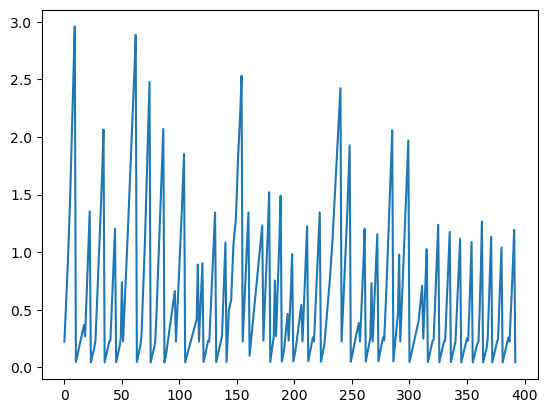

In [13]:
grouped_data = df.groupby(['match_id', 'set_no', 'game_no'])['综合得分指数'].cumsum().reset_index(name='a')
points_won_lists = grouped_data['a'].tolist()
# points_won_lists
plt.plot(np.array(points_won_lists)[:393])
plt.show()

In [1]:
import pandas as pd

In [17]:
wimbledon_double = pd.read_csv('2023-wimbledon-points-doubles.csv')
wimbledon_double

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,...,P2TurningPoint,ServeNumber,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount,ServeWidth,ServeDepth,ReturnDepth
0,2023-wimbledon-3101,0:00:00,1,0,0,0,1,0,1,1,...,NaN,2,0,0,0,0,3,NaN,NaN,NaN
1,2023-wimbledon-3101,0:00:38,1,0,0,0,1,0,2,1,...,NaN,1,0,0,0,0,1,NaN,NaN,NaN
2,2023-wimbledon-3101,0:00:55,1,0,0,0,1,0,3,1,...,NaN,2,0,0,0,0,3,NaN,NaN,NaN
3,2023-wimbledon-3101,0:01:31,1,0,0,0,1,0,4,2,...,NaN,1,0,0,0,0,2,NaN,NaN,NaN
4,2023-wimbledon-3101,0:02:17,1,1,0,0,1,1,5,1,...,NaN,1,0,0,0,0,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17977,2023-wimbledon-4601,1:48:12,2,4,5,0,10,0,151,2,...,NaN,1,0,0,0,0,10,NaN,NaN,NaN
17978,2023-wimbledon-4601,1:49:00,2,4,5,0,10,0,152,2,...,NaN,1,0,0,0,0,6,NaN,NaN,NaN
17979,2023-wimbledon-4601,1:49:39,2,4,5,0,10,0,153,1,...,NaN,1,0,0,0,0,3,NaN,NaN,NaN
17980,2023-wimbledon-4601,1:50:10,2,4,5,0,10,0,154,2,...,NaN,1,0,0,0,0,6,NaN,NaN,NaN


In [18]:
p1 = wimbledon_double.loc[:, ['P1Ace', 'P1Winner', 'P1UnfErr', 'P1NetPoint', 'P1BreakPoint', 'ServeIndicator']]
p1

,P1Ace,P1Winner,P1UnfErr,P1NetPoint,P1BreakPoint,ServeIndicator
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,2
...,...,...,...,...,...,...
17977,0,0,0,0,0,1
17978,0,0,0,0,0,1
17979,0,0,0,0,0,1
17980,0,0,0,0,0,1


In [19]:
p1['ServeIndicator'] = p1['ServeIndicator'].replace(2, 0)
p1['ServeIndicator']

0        1
1        1
2        1
3        1
4        0
        ..
17977    1
17978    1
17979    1
17980    1
17981    0
Name: ServeIndicator, Length: 17982, dtype: int64

In [20]:
p1 = pd.concat([p1, wimbledon_double['match_id']], axis=True)
p1

,P1Ace,P1Winner,P1UnfErr,P1NetPoint,P1BreakPoint,ServeIndicator,match_id
0,0,0,0,0,0,1,2023-wimbledon-3101
1,0,0,0,0,0,1,2023-wimbledon-3101
2,0,0,0,0,0,1,2023-wimbledon-3101
3,0,0,0,0,0,1,2023-wimbledon-3101
4,0,0,0,0,0,0,2023-wimbledon-3101
...,...,...,...,...,...,...,...
17977,0,0,0,0,0,1,2023-wimbledon-4601
17978,0,0,0,0,0,1,2023-wimbledon-4601
17979,0,0,0,0,0,1,2023-wimbledon-4601
17980,0,0,0,0,0,1,2023-wimbledon-4601


In [21]:
p1.isna().sum()

P1Ace             0
P1Winner          0
P1UnfErr          0
P1NetPoint        0
P1BreakPoint      0
ServeIndicator    0
match_id          0
dtype: int64

In [22]:
d1 = p1.copy()
result_df = pd.DataFrame()
groups = p1.groupby('match_id')
for group_name, group_data in groups:
    # 取出每个组的第二行至最后一行
    group_data = group_data.iloc[:-1]
    # 添加一个新的第一行
    new_row = pd.Series([0] * len(p1.columns), index=p1.columns)
    new_row['match_id'] = group_name
    group_data = pd.concat([pd.DataFrame(new_row).transpose(), group_data])
    # 将结果添加到结果 DataFrame 中
    result_df = pd.concat([result_df, group_data])
result_df

,P1Ace,P1Winner,P1UnfErr,P1NetPoint,P1BreakPoint,ServeIndicator,match_id
0,0,0,0,0,0,0,2023-wimbledon-3101
0,0,0,0,0,0,1,2023-wimbledon-3101
1,0,0,0,0,0,1,2023-wimbledon-3101
2,0,0,0,0,0,1,2023-wimbledon-3101
3,0,0,0,0,0,1,2023-wimbledon-3101
...,...,...,...,...,...,...,...
17976,0,0,0,0,0,1,2023-wimbledon-4601
17977,0,0,0,0,0,1,2023-wimbledon-4601
17978,0,0,0,0,0,1,2023-wimbledon-4601
17979,0,0,0,0,0,1,2023-wimbledon-4601


In [23]:
def calculate_momentum_improved(da, index):
    dd = pd.DataFrame()
    
    dd['index'] = da['P1Ace'] * 0.062 + da['P1Winner']*0.405 - da['P1UnfErr']*0.213 
    + da['P1BreakPoint'] * 0.0325 + da['P1NetPoint']*0.106 + da['ServeIndicator']*0.181
    
    return dd['index']

In [24]:
df = calculate_momentum_improved(result_df, 'p1')
df

0        0.0
0        0.0
1        0.0
2        0.0
3        0.0
        ... 
17976    0.0
17977    0.0
17978    0.0
17979    0.0
17980    0.0
Name: index, Length: 17982, dtype: object

In [25]:
p2 = wimbledon_double.loc[:, ['P2Ace', 'P2Winner', 'P2UnfErr', 'P2NetPoint', 'P2BreakPoint', 'ServeIndicator']]
p2

,P2Ace,P2Winner,P2UnfErr,P2NetPoint,P2BreakPoint,ServeIndicator
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,2
...,...,...,...,...,...,...
17977,0,0,0,0,0,1
17978,0,0,0,0,0,1
17979,0,0,0,0,1,1
17980,0,0,0,0,0,1


In [26]:
p2['ServeIndicator'] = p2['ServeIndicator'].replace(1, 0)
p2['ServeIndicator'] = p2['ServeIndicator'].replace(2, 1)
p2['ServeIndicator']

0        0
1        0
2        0
3        0
4        1
        ..
17977    0
17978    0
17979    0
17980    0
17981    1
Name: ServeIndicator, Length: 17982, dtype: int64

In [27]:
p2.isna().sum()

P2Ace             0
P2Winner          0
P2UnfErr          0
P2NetPoint        0
P2BreakPoint      0
ServeIndicator    0
dtype: int64

In [28]:
p2 = pd.concat([p2, wimbledon_double['match_id']], axis=True)
p2

,P2Ace,P2Winner,P2UnfErr,P2NetPoint,P2BreakPoint,ServeIndicator,match_id
0,0,0,0,0,0,0,2023-wimbledon-3101
1,0,0,0,0,0,0,2023-wimbledon-3101
2,0,0,0,0,0,0,2023-wimbledon-3101
3,0,0,0,0,0,0,2023-wimbledon-3101
4,0,0,0,0,0,1,2023-wimbledon-3101
...,...,...,...,...,...,...,...
17977,0,0,0,0,0,0,2023-wimbledon-4601
17978,0,0,0,0,0,0,2023-wimbledon-4601
17979,0,0,0,0,1,0,2023-wimbledon-4601
17980,0,0,0,0,0,0,2023-wimbledon-4601


In [29]:
d2 = p2.copy()
result_df = pd.DataFrame()
groups = p2.groupby('match_id')
for group_name, group_data in groups:
    # 取出每个组的第二行至最后一行
    group_data = group_data.iloc[:-1]
    # 添加一个新的第一行
    new_row = pd.Series([0] * len(p2.columns), index=p2.columns)
    new_row['match_id'] = group_name
    group_data = pd.concat([pd.DataFrame(new_row).transpose(), group_data])
    # 将结果添加到结果 DataFrame 中
    result_df = pd.concat([result_df, group_data])
result_df

,P2Ace,P2Winner,P2UnfErr,P2NetPoint,P2BreakPoint,ServeIndicator,match_id
0,0,0,0,0,0,0,2023-wimbledon-3101
0,0,0,0,0,0,0,2023-wimbledon-3101
1,0,0,0,0,0,0,2023-wimbledon-3101
2,0,0,0,0,0,0,2023-wimbledon-3101
3,0,0,0,0,0,0,2023-wimbledon-3101
...,...,...,...,...,...,...,...
17976,0,0,0,0,0,0,2023-wimbledon-4601
17977,0,0,0,0,0,0,2023-wimbledon-4601
17978,0,0,0,0,0,0,2023-wimbledon-4601
17979,0,0,0,0,1,0,2023-wimbledon-4601


In [44]:
def calculate_momentum_improved1(da, index):
    dd = pd.DataFrame()
    
    dd['index'] = da['P2Ace'] * 0.062 + da['P2Winner']*0.405 - da['P2UnfErr']*0.213 
    + da['P2BreakPoint'] * 0.0325 + da['P2NetPoint']*0.106 + da['ServeIndicator']*0.181
    
    return dd['index']

In [45]:
df1 = calculate_momentum_improved1(p2, 'p2')
df1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17977    0.0
17978    0.0
17979    0.0
17980    0.0
17981    0.0
Name: index, Length: 17982, dtype: float64

In [46]:
np.array(df).tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.467,
 0.467,
 0.0,
 0.0,
 0.405,
 0.405,
 0.0,
 0.0,
 0.405,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.467,
 0.0,
 0.467,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.213,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.467,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.467,
 -0.213,
 0.467,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [47]:
np.array(df1).tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.467,
 -0.213,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.213,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.405,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.213,
 0.0,
 0.0,
 0.0,
 0.0,
 0.405,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.405,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.405,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.213,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.213,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.213,
 -0.213,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [48]:
import numpy as np
delta = np.array(np.array(df).tolist()) - np.array(np.array(df1).tolist())
delta

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
np.unique(delta, return_counts=True)

(array([-0.68 , -0.618, -0.467, -0.405, -0.213, -0.062,  0.   ,  0.062,
         0.213,  0.405,  0.467,  0.618,  0.68 ]),
 array([    2,    15,   380,   506,   585,    13, 14986,    11,   629,
          470,   356,    18,    11], dtype=int64))

In [55]:
data = pd.concat([p1, p2], axis=1)
data

,P1Ace,P1Winner,P1UnfErr,P1NetPoint,P1BreakPoint,ServeIndicator,match_id,P2Ace,P2Winner,P2UnfErr,P2NetPoint,P2BreakPoint,ServeIndicator,match_id
0,0,0,0,0,0,1,2023-wimbledon-3101,0,0,0,0,0,0,2023-wimbledon-3101
1,0,0,0,0,0,1,2023-wimbledon-3101,0,0,0,0,0,0,2023-wimbledon-3101
2,0,0,0,0,0,1,2023-wimbledon-3101,0,0,0,0,0,0,2023-wimbledon-3101
3,0,0,0,0,0,1,2023-wimbledon-3101,0,0,0,0,0,0,2023-wimbledon-3101
4,0,0,0,0,0,0,2023-wimbledon-3101,0,0,0,0,0,1,2023-wimbledon-3101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17977,0,0,0,0,0,1,2023-wimbledon-4601,0,0,0,0,0,0,2023-wimbledon-4601
17978,0,0,0,0,0,1,2023-wimbledon-4601,0,0,0,0,0,0,2023-wimbledon-4601
17979,0,0,0,0,0,1,2023-wimbledon-4601,0,0,0,0,1,0,2023-wimbledon-4601
17980,0,0,0,0,0,1,2023-wimbledon-4601,0,0,0,0,0,0,2023-wimbledon-4601


In [56]:
data['delta'] = delta
data

,P1Ace,P1Winner,P1UnfErr,P1NetPoint,P1BreakPoint,ServeIndicator,match_id,P2Ace,P2Winner,P2UnfErr,P2NetPoint,P2BreakPoint,ServeIndicator,match_id,delta
0,0,0,0,0,0,1,2023-wimbledon-3101,0,0,0,0,0,0,2023-wimbledon-3101,0.0
1,0,0,0,0,0,1,2023-wimbledon-3101,0,0,0,0,0,0,2023-wimbledon-3101,0.0
2,0,0,0,0,0,1,2023-wimbledon-3101,0,0,0,0,0,0,2023-wimbledon-3101,0.0
3,0,0,0,0,0,1,2023-wimbledon-3101,0,0,0,0,0,0,2023-wimbledon-3101,0.0
4,0,0,0,0,0,0,2023-wimbledon-3101,0,0,0,0,0,1,2023-wimbledon-3101,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17977,0,0,0,0,0,1,2023-wimbledon-4601,0,0,0,0,0,0,2023-wimbledon-4601,0.0
17978,0,0,0,0,0,1,2023-wimbledon-4601,0,0,0,0,0,0,2023-wimbledon-4601,0.0
17979,0,0,0,0,0,1,2023-wimbledon-4601,0,0,0,0,1,0,2023-wimbledon-4601,0.0
17980,0,0,0,0,0,1,2023-wimbledon-4601,0,0,0,0,0,0,2023-wimbledon-4601,0.0


In [58]:
data.to_excel('double.xlsx')

In [59]:
data.to_csv('double.csv')

In [63]:
rank = pd.read_csv('rank.txt', sep='\s{2,}', header=0)

rank

C:\Users\28266\AppData\Local\Temp\ipykernel_58632\2855356207.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rank = pd.read_csv('rank.txt', sep='\s{2,}', header=0)


,Player World,Ranking
0,Carlos Alcaraz,15
1,Alexander Zverev,3
2,Frances Tiafoe,41
3,Alejandro Davidovich Fokina,34
4,Daniil Medvedev,2
5,Jiri Lehecka,205
6,Christopher Eubanks,191
7,Laslo Djere,54
8,Jannik Sinner,11
9,Daniel Elahi Galan,75


In [67]:
data = pd.read_excel('data11.xlsx')
data

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,match_id,p1_score,set_no,game_no,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won
0,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0
1,0,0,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0
2,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0
3,0,1,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0
4,1,1,0,0,0,1,2023-wimbledon-1301,0.405,1,1,0.000,0.405,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,2023-wimbledon-1701,-0.213,5,10,0.000,-0.213,0,0,0,0,0
7280,0,1,0,0,1,1,2023-wimbledon-1701,0.405,5,10,0.000,0.405,0,0,0,0,0
7281,0,0,0,0,0,1,2023-wimbledon-1701,0.405,5,10,0.405,0.000,0,1,0,0,0
7282,0,0,0,0,0,1,2023-wimbledon-1701,0.000,5,10,0.000,0.000,0,0,0,0,0


In [68]:
wimbledon = pd.read_csv('Wimbledon_featured_matches.csv')
wimbledon

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:39:58,5,10,330,2,2,5,...,0,0,0,38.620,50.971,11,123.0,C,NCTL,D
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:40:43,5,10,331,2,2,5,...,0,0,0,17.533,27.766,5,114.0,W,NCTL,ND
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:20,5,10,332,2,2,5,...,0,0,0,10.882,18.328,4,124.0,W,NCTL,D
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:52,5,10,333,2,2,5,...,0,0,0,7.893,10.537,1,130.0,C,NCTL,D


In [73]:
data = pd.concat([data, wimbledon['player1']], axis=1)
data = pd.concat([data, wimbledon['player2']], axis=1)
data

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,match_id,p1_score,set_no,game_no,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won,player1,player2
0,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0,Carlos Alcaraz,Nicolas Jarry
1,0,0,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0,Carlos Alcaraz,Nicolas Jarry
2,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0,Carlos Alcaraz,Nicolas Jarry
3,0,1,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0,Carlos Alcaraz,Nicolas Jarry
4,1,1,0,0,0,1,2023-wimbledon-1301,0.405,1,1,0.000,0.405,0,0,0,0,0,Carlos Alcaraz,Nicolas Jarry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,2023-wimbledon-1701,-0.213,5,10,0.000,-0.213,0,0,0,0,0,Carlos Alcaraz,Novak Djokovic
7280,0,1,0,0,1,1,2023-wimbledon-1701,0.405,5,10,0.000,0.405,0,0,0,0,0,Carlos Alcaraz,Novak Djokovic
7281,0,0,0,0,0,1,2023-wimbledon-1701,0.405,5,10,0.405,0.000,0,1,0,0,0,Carlos Alcaraz,Novak Djokovic
7282,0,0,0,0,0,1,2023-wimbledon-1701,0.000,5,10,0.000,0.000,0,0,0,0,0,Carlos Alcaraz,Novak Djokovic


In [74]:
rank.set_index('Player World', inplace=True)
rank = rank['Ranking'].to_dict()
rank

{'Carlos Alcaraz': 15,
 'Alexander Zverev': 3,
 'Frances Tiafoe': 41,
 'Alejandro Davidovich Fokina': 34,
 'Daniil Medvedev': 2,
 'Jiri Lehecka': 205,
 'Christopher Eubanks': 191,
 'Laslo Djere': 54,
 'Jannik Sinner': 11,
 'Daniel Elahi Galan': 75,
 'Guido Pella': 115,
 'Denis Shapovalov': 12,
 'Andrey Rublev': 7,
 'Alexander Bublik': 37,
 'Lorenzo Musetti': 58,
 'Stan Wawrinka': 189,
 'Grigor Dimitrov': 21,
 'Roman Safiullin': 90,
 'Hubert Hurkacz': 16,
 'Nicolas Jarry': 112,
 'Matteo Berrettini': 8,
 'Holger Rune': 83,
 'Marton Fucsovics': 48,
 'Tommy Paul': 52,
 "Christopher O'Connell": 121,
 'Stefanos Tsitsipas': 4,
 'Quentin Halys': 223,
 'Mikael Ymer': 60,
 'Liam Broady': 154,
 'David Goffin': 42,
 'Maximilian Marterer': 214,
 'Novak Djokovic': 1}

In [75]:
data['player1'] = data['player1'].replace(rank)
data

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,match_id,p1_score,set_no,game_no,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won,player1,player2
0,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0,15,Nicolas Jarry
1,0,0,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0,15,Nicolas Jarry
2,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0,15,Nicolas Jarry
3,0,1,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0,15,Nicolas Jarry
4,1,1,0,0,0,1,2023-wimbledon-1301,0.405,1,1,0.000,0.405,0,0,0,0,0,15,Nicolas Jarry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,2023-wimbledon-1701,-0.213,5,10,0.000,-0.213,0,0,0,0,0,15,Novak Djokovic
7280,0,1,0,0,1,1,2023-wimbledon-1701,0.405,5,10,0.000,0.405,0,0,0,0,0,15,Novak Djokovic
7281,0,0,0,0,0,1,2023-wimbledon-1701,0.405,5,10,0.405,0.000,0,1,0,0,0,15,Novak Djokovic
7282,0,0,0,0,0,1,2023-wimbledon-1701,0.000,5,10,0.000,0.000,0,0,0,0,0,15,Novak Djokovic


In [76]:
data['player2'] = data['player2'].replace(rank)
data

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,match_id,p1_score,set_no,game_no,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won,player1,player2
0,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0,15,112
1,0,0,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0,15,112
2,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0,15,112
3,0,1,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0,15,112
4,1,1,0,0,0,1,2023-wimbledon-1301,0.405,1,1,0.000,0.405,0,0,0,0,0,15,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,2023-wimbledon-1701,-0.213,5,10,0.000,-0.213,0,0,0,0,0,15,1
7280,0,1,0,0,1,1,2023-wimbledon-1701,0.405,5,10,0.000,0.405,0,0,0,0,0,15,1
7281,0,0,0,0,0,1,2023-wimbledon-1701,0.405,5,10,0.405,0.000,0,1,0,0,0,15,1
7282,0,0,0,0,0,1,2023-wimbledon-1701,0.000,5,10,0.000,0.000,0,0,0,0,0,15,1


In [77]:
data = data.rename(columns={'player1': 'player1_rank', 'player2': 'player2_rank'})

data


,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,match_id,p1_score,set_no,game_no,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won,player1_rank,player2_rank
0,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0,15,112
1,0,0,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0,15,112
2,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0,15,112
3,0,1,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0,15,112
4,1,1,0,0,0,1,2023-wimbledon-1301,0.405,1,1,0.000,0.405,0,0,0,0,0,15,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,2023-wimbledon-1701,-0.213,5,10,0.000,-0.213,0,0,0,0,0,15,1
7280,0,1,0,0,1,1,2023-wimbledon-1701,0.405,5,10,0.000,0.405,0,0,0,0,0,15,1
7281,0,0,0,0,0,1,2023-wimbledon-1701,0.405,5,10,0.405,0.000,0,1,0,0,0,15,1
7282,0,0,0,0,0,1,2023-wimbledon-1701,0.000,5,10,0.000,0.000,0,0,0,0,0,15,1


In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
data.to_csv('rank.csv')

NameError: name 'data' is not defined

In [34]:
data = pd.read_csv('double.csv')
data

,P1Ace,P1Winner,P1UnfErr,P1NetPoint,P1BreakPoint,ServeIndicator,P2Ace,P2Winner,P2UnfErr,P2NetPoint,P2BreakPoint,delta
0,0,0,0,0,0,1,0,0,0,0,0,0.0
1,0,0,0,0,0,1,0,0,0,0,0,0.0
2,0,0,0,0,0,1,0,0,0,0,0,0.0
3,0,0,0,0,0,1,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17977,0,0,0,0,0,1,0,0,0,0,0,0.0
17978,0,0,0,0,0,1,0,0,0,0,0,0.0
17979,0,0,0,0,0,1,0,0,0,0,1,0.0
17980,0,0,0,0,0,1,0,0,0,0,0,0.0


In [35]:
data['delta'] = data['delta'].apply(lambda x: 0 if x != 0 else 1)

data


,P1Ace,P1Winner,P1UnfErr,P1NetPoint,P1BreakPoint,ServeIndicator,P2Ace,P2Winner,P2UnfErr,P2NetPoint,P2BreakPoint,delta
0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17977,0,0,0,0,0,1,0,0,0,0,0,1
17978,0,0,0,0,0,1,0,0,0,0,0,1
17979,0,0,0,0,0,1,0,0,0,0,1,1
17980,0,0,0,0,0,1,0,0,0,0,0,1


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [37]:
X = data.drop('delta', axis=1)
y = data['delta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]  # 是否采用bootstrap样本
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("最佳参数:", grid_search.best_params_)
print("最佳分数:", grid_search.best_score_)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("测试集上的准确率:", test_accuracy)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
最佳参数: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
最佳分数: 0.9179701077511296
测试集上的准确率: 0.9218793438976925


In [4]:
# 获取前一个和后一个元素
data['prev'] = data['delta'].shift(1)
data['next'] = data['delta'].shift(-1)

# 应用条件逻辑
data['delta'] = np.where(
    data['delta'] != 0, 0,  # 如果A不等于0，则置为0
    np.where(
        (data['prev'] * data['next'] < 0), 1, 0  # 如果A等于0且前后符号相反，则置为1，否则保持0
    )
)

# 删除辅助列
data.drop(['prev', 'next'], axis=1, inplace=True)

data

,P1Ace,P1Winner,P1UnfErr,P1NetPoint,P1BreakPoint,ServeIndicator,P2Ace,P2Winner,P2UnfErr,P2NetPoint,P2BreakPoint,delta
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17977,0,0,0,0,0,1,0,0,0,0,0,0
17978,0,0,0,0,0,1,0,0,0,0,0,0
17979,0,0,0,0,0,1,0,0,0,0,1,0
17980,0,0,0,0,0,1,0,0,0,0,0,0


In [16]:
X = data.drop('delta', axis=1)
y = data['delta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # 输入层 + 第一个隐藏层
    Dense(10, activation='relu'),  # 另一个隐藏层
    Dense(1, activation='sigmoid')  # 输出层
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

Epoch 1/10
450/450 [==============================] - 1s 2ms/step - loss: 0.4223 - accuracy: 0.8766 - val_loss: 0.3064 - val_accuracy: 0.9102
Epoch 2/10
450/450 [==============================] - 1s 1ms/step - loss: 0.2799 - accuracy: 0.9198 - val_loss: 0.2956 - val_accuracy: 0.9124
Epoch 3/10
450/450 [==============================] - 1s 2ms/step - loss: 0.2762 - accuracy: 0.9203 - val_loss: 0.2952 - val_accuracy: 0.9124
Epoch 4/10
450/450 [==============================] - 1s 1ms/step - loss: 0.2759 - accuracy: 0.9203 - val_loss: 0.2954 - val_accuracy: 0.9124
Epoch 5/10
450/450 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.9203 - val_loss: 0.2957 - val_accuracy: 0.9124
Epoch 6/10
450/450 [==============================] - 1s 1ms/step - loss: 0.2757 - accuracy: 0.9203 - val_loss: 0.2948 - val_accuracy: 0.9124
Epoch 7/10
450/450 [==============================] - 1s 1ms/step - loss: 0.2755 - accuracy: 0.9203 - val_loss: 0.2963 - val_accuracy: 0.9124
Epoch 

In [18]:
# 获取数组中每个不同值及其出现的次数
unique_values, counts = np.unique(y, return_counts=True)

# 打印每个值及其出现次数
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Value: 0, Count: 2996
Value: 1, Count: 14986


113/113 [==============================] - 0s 544us/step
AUC: 0.7727


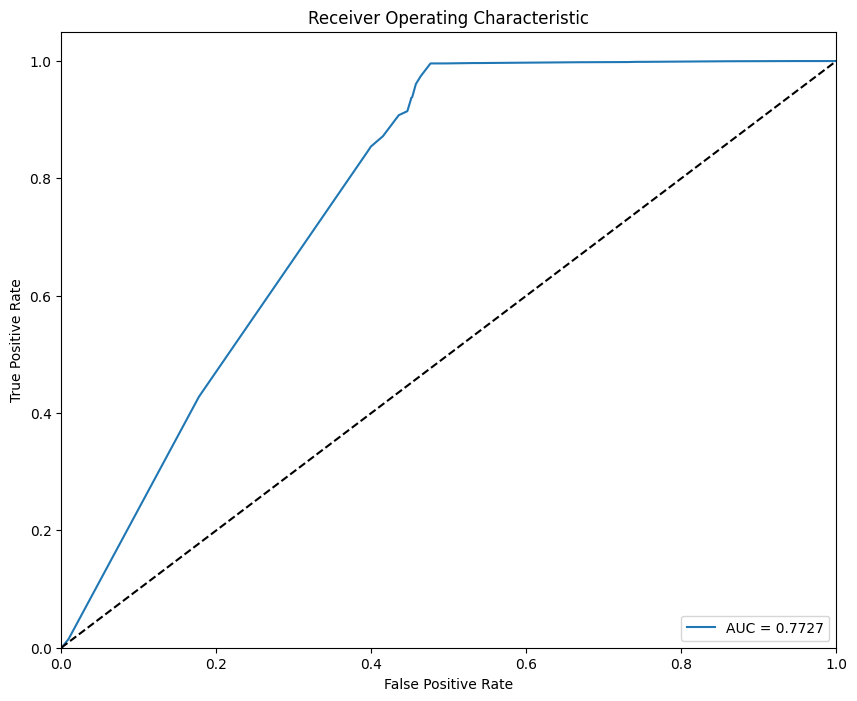

In [21]:
# 预测测试集
y_pred = model.predict(X_test).ravel()

# 计算AUC值
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")

# 计算ROC曲线的值
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # 随机概率线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
weights, biases = model.layers[0].get_weights()
print("Weights:", weights)

Weights: [[-1.97877482e-01  1.86379328e-01 -6.79647923e-03  2.21741498e-01
   5.72032258e-02 -9.37782452e-02  2.85031408e-01  1.17408231e-01
   4.88345355e-01 -3.97374749e-01]
 [-3.66229683e-01  4.50699478e-01 -3.35882008e-01  2.32978255e-01
   5.89005016e-02  1.39201820e-01  2.30020151e-01 -1.73627138e-01
   2.30292976e-01 -6.18934110e-02]
 [-2.68471718e-01 -3.67026180e-01 -1.71599865e-01  6.04141690e-02
   5.02138197e-01  4.30093467e-01  4.73084956e-01  4.07525778e-01
   2.87891090e-01  1.90201923e-01]
 [ 2.95927465e-01 -1.89026147e-01  3.13435078e-01 -1.26076221e-01
  -2.90427685e-01 -1.28547430e-01 -2.13417023e-01  4.98654544e-01
  -2.04520822e-02  3.85085821e-01]
 [-2.45229749e-04 -3.39837283e-01  1.35312155e-01 -3.63508850e-01
   2.39929646e-01  7.95996040e-02  3.44211489e-01  2.58571021e-02
   4.10307869e-02  4.04561125e-02]
 [ 5.36435664e-01  2.17302695e-01  7.87728354e-02  6.62467420e-01
   1.61147162e-01  3.39538932e-01 -8.98713917e-02 -2.09173318e-02
  -4.54501688e-01 -5.435

In [17]:
a = abs(weights[-1]) / sum(abs(weights[-1]))
a

array([0.30872247, 0.10599352, 0.05205194, 0.08409785, 0.05060659,
       0.23721866, 0.00682497, 0.05061582, 0.06583332, 0.03803487],
      dtype=float32)

In [38]:
data = pd.read_csv('rank.csv')
data

,Unnamed: 0,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,match_id,p1_score,set_no,game_no,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won,player1_rank,player2_rank
0,0,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0,15,112
1,1,0,0,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0,15,112
2,2,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0,15,112
3,3,0,1,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0,15,112
4,4,1,1,0,0,0,1,2023-wimbledon-1301,0.405,1,1,0.000,0.405,0,0,0,0,0,15,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,7279,0,1,0,0,0,1,2023-wimbledon-1701,-0.213,5,10,0.000,-0.213,0,0,0,0,0,15,1
7280,7280,0,1,0,0,1,1,2023-wimbledon-1701,0.405,5,10,0.000,0.405,0,0,0,0,0,15,1
7281,7281,0,0,0,0,0,1,2023-wimbledon-1701,0.405,5,10,0.405,0.000,0,1,0,0,0,15,1
7282,7282,0,0,0,0,0,1,2023-wimbledon-1701,0.000,5,10,0.000,0.000,0,0,0,0,0,15,1


In [39]:
data['gap'] = data['gap'].apply(lambda x: 0 if x != 0 else 1)

data


,Unnamed: 0,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,match_id,p1_score,set_no,game_no,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won,player1_rank,player2_rank
0,0,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,1,0,0,0,0,0,15,112
1,1,0,0,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,0,0,0,0,0,0,15,112
2,2,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,1,0,0,0,0,0,15,112
3,3,0,1,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,0,0,0,0,0,0,15,112
4,4,1,1,0,0,0,1,2023-wimbledon-1301,0.405,1,1,0.000,0,0,0,0,0,0,15,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,7279,0,1,0,0,0,1,2023-wimbledon-1701,-0.213,5,10,0.000,0,0,0,0,0,0,15,1
7280,7280,0,1,0,0,1,1,2023-wimbledon-1701,0.405,5,10,0.000,0,0,0,0,0,0,15,1
7281,7281,0,0,0,0,0,1,2023-wimbledon-1701,0.405,5,10,0.405,1,0,1,0,0,0,15,1
7282,7282,0,0,0,0,0,1,2023-wimbledon-1701,0.000,5,10,0.000,1,0,0,0,0,0,15,1


In [40]:
X = data.drop(['gap', 'match_id', 'Unnamed: 0', 'p2_score', 'p1_score', 'set_no', 'game_no'], axis=1)
y = data['gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # 输入层 + 第一个隐藏层
    Dense(10, activation='relu'),  # 另一个隐藏层
    Dense(1, activation='sigmoid')  # 输出层
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
X

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won,player1_rank,player2_rank
0,0,0,1,0,0,1,0,0,0,0,0,15,112
1,0,0,0,0,0,1,0,0,0,0,0,15,112
2,0,0,1,0,0,1,0,0,0,0,0,15,112
3,0,1,0,0,0,1,0,0,0,0,0,15,112
4,1,1,0,0,0,1,0,0,0,0,0,15,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,0,0,0,0,0,15,1
7280,0,1,0,0,1,1,0,0,0,0,0,15,1
7281,0,0,0,0,0,1,0,1,0,0,0,15,1
7282,0,0,0,0,0,1,0,0,0,0,0,15,1


In [27]:
# 获取数组中每个不同值及其出现的次数
unique_values, counts = np.unique(y, return_counts=True)

# 打印每个值及其出现次数
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Value: 0, Count: 3537
Value: 1, Count: 3747


In [42]:
y

0       1
1       0
2       1
3       0
4       0
       ..
7279    0
7280    0
7281    1
7282    1
7283    1
Name: gap, Length: 7284, dtype: int64

In [48]:
from sklearn.preprocessing import MinMaxScaler
# 初始化MinMaxScaler
scaler = MinMaxScaler()

# 拟合数据并转换
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [49]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]  # 是否采用bootstrap样本
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("最佳参数:", grid_search.best_params_)
print("最佳分数:", grid_search.best_score_)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("测试集上的准确率:", test_accuracy)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
最佳参数: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
最佳分数: 0.7597405752398061
测试集上的准确率: 0.7282086479066575


In [47]:
X_scaled

array([[0.        , 0.        , 1.        , ..., 0.        , 0.06403941,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06403941,
        0.5       ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.06403941,
        0.5       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.06403941,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06403941,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06403941,
        0.        ]])

In [29]:
y

0       1
1       0
2       1
3       0
4       0
       ..
7279    0
7280    0
7281    1
7282    1
7283    1
Name: gap, Length: 7284, dtype: int64

In [31]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

Epoch 1/50
183/183 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7498 - val_loss: 0.5245 - val_accuracy: 0.7591
Epoch 2/50
183/183 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.7409 - val_loss: 0.5686 - val_accuracy: 0.7145
Epoch 3/50
183/183 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7426 - val_loss: 0.5304 - val_accuracy: 0.7474
Epoch 4/50
183/183 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.7440 - val_loss: 0.5185 - val_accuracy: 0.7591
Epoch 5/50
183/183 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7470 - val_loss: 0.5277 - val_accuracy: 0.7481
Epoch 6/50
183/183 [==============================] - 0s 1ms/step - loss: 0.5352 - accuracy: 0.7455 - val_loss: 0.5200 - val_accuracy: 0.7591
Epoch 7/50
183/183 [==============================] - 0s 1ms/step - loss: 0.5377 - accuracy: 0.7419 - val_loss: 0.5198 - val_accuracy: 0.7591
Epoch 

In [32]:
weights, biases = model.layers[0].get_weights()
print("Weights:", weights)

Weights: [[ 1.16515934e-01  6.50898516e-01 -2.34331369e-01 -6.73478842e-03
  -1.44921511e-01  4.97087657e-01 -5.36452532e-02  4.02907073e-01
  -3.99385124e-01 -3.80965918e-01]
 [ 7.05865622e-02  4.28758740e-01 -4.51504141e-01 -6.93894327e-02
   4.08086292e-02  3.59988332e-01 -9.74212587e-02 -4.57911164e-01
  -4.10191894e-01 -1.13321678e-03]
 [ 3.23664367e-01  2.12874919e-01 -2.54104555e-01 -5.05475402e-01
  -5.35777621e-02 -3.01511347e-01 -2.46555358e-01 -8.21729302e-02
  -1.73709512e-01 -2.30619758e-01]
 [ 1.44939244e-01  3.18863630e-01 -5.58518581e-02  2.16370344e-01
  -7.98387453e-02  4.50308502e-01 -3.71295810e-01  5.12235165e-02
   5.84174395e-02 -5.70133865e-01]
 [ 3.09337378e-01 -2.96249092e-01 -8.68247077e-02  2.13188767e-01
  -2.43997741e-02  2.87235796e-01  3.51361036e-02  2.88901031e-01
  -4.88253534e-01  7.88084194e-02]
 [-4.44158345e-01 -6.70191646e-02 -7.84782171e-01  2.13885069e-01
   3.53322655e-01 -2.98578829e-01 -3.88359189e-01  4.04961348e-01
  -4.79249984e-01 -4.508

In [33]:
weights, biases = model.layers[0].get_weights()
print("Weights:", weights)

Weights: [[ 1.16515934e-01  6.50898516e-01 -2.34331369e-01 -6.73478842e-03
  -1.44921511e-01  4.97087657e-01 -5.36452532e-02  4.02907073e-01
  -3.99385124e-01 -3.80965918e-01]
 [ 7.05865622e-02  4.28758740e-01 -4.51504141e-01 -6.93894327e-02
   4.08086292e-02  3.59988332e-01 -9.74212587e-02 -4.57911164e-01
  -4.10191894e-01 -1.13321678e-03]
 [ 3.23664367e-01  2.12874919e-01 -2.54104555e-01 -5.05475402e-01
  -5.35777621e-02 -3.01511347e-01 -2.46555358e-01 -8.21729302e-02
  -1.73709512e-01 -2.30619758e-01]
 [ 1.44939244e-01  3.18863630e-01 -5.58518581e-02  2.16370344e-01
  -7.98387453e-02  4.50308502e-01 -3.71295810e-01  5.12235165e-02
   5.84174395e-02 -5.70133865e-01]
 [ 3.09337378e-01 -2.96249092e-01 -8.68247077e-02  2.13188767e-01
  -2.43997741e-02  2.87235796e-01  3.51361036e-02  2.88901031e-01
  -4.88253534e-01  7.88084194e-02]
 [-4.44158345e-01 -6.70191646e-02 -7.84782171e-01  2.13885069e-01
   3.53322655e-01 -2.98578829e-01 -3.88359189e-01  4.04961348e-01
  -4.79249984e-01 -4.508